# CoP3E features selection

### Import packages

In [1]:
#packages
from modules.feature_calculator import FeatureCalculator
import pickle

# Mute seaborn FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Project specific tools

In [2]:
#class
fc = FeatureCalculator()

In [3]:
#dataset
ensembl_pseudogene = pickle.load(open('data/ensembl_pseudogene.pkl', 'rb'))
datasets = fc.datasets(ensembl_pseudogene)

In [4]:
cnts_dict = fc.get_cnts_dict(datasets)
all_cnts = fc.get_all_cnts(cnts_dict)
frqs_dict = fc.get_frqs_dict(datasets)

In [5]:
#features chi2 calculation
chi2 = fc.get_chi2(all_cnts)

In [6]:
#selecting features with chi2 score above 75.
selected_features = fc.get_features(chi2, 75)
pickle.dump(selected_features, open('data/selected_features.pkl', 'wb'))

In [7]:
pickle.dump(datasets, open('data/datasets.pkl', 'wb'))
pickle.dump(frqs_dict, open('data/frqs_dict.pkl', 'wb'))

### Features

In [8]:
features_df = fc.get_features_df(chi2, frqs_dict)
print(features_df[:50])

                       chi2        p_value  c_mean_frq  n_mean_frq
synonymous_TGA   725.512387  8.472428e-160    0.583524    0.438247
dnt_TA           698.359879  6.797665e-154    0.038489    0.045830
degeneracy_low   571.145523  3.163262e-126    0.384019    0.363264
codons_ATG       544.906071  1.614864e-120    0.023351    0.018997
dnt_GA           472.266048  1.029586e-104    0.086733    0.079157
codons_TAG       321.278223   7.629188e-72    0.006598    0.008972
synonymous_TAG   309.386356   2.971004e-69    0.172861    0.180246
codons_TCT       278.222007   1.832551e-62    0.014942    0.019142
codons_TTA       271.981468   4.198196e-61    0.009013    0.010901
nt_G             267.057357   4.968877e-60    0.257448    0.251175
dnt_TG           260.565136   1.292202e-58    0.089496    0.084344
codons_ATA       251.045467   1.536456e-56    0.009521    0.011745
codons_TAA       233.778205   8.941444e-53    0.010147    0.011889
synonymous_TAA   225.415506   5.959190e-51    0.239183    0.22

Box plots of selected features with Chi2 score above 75. Dots represent selected feature frequencies for every transcripts within class.

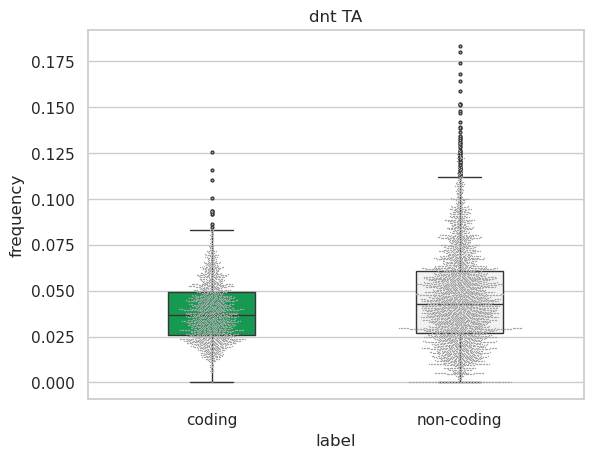

In [13]:
fig = fc.get_boxplot('dnt', 'TA', frqs_dict)
fig.savefig('figures/boxplot/dnt_TA.svg')

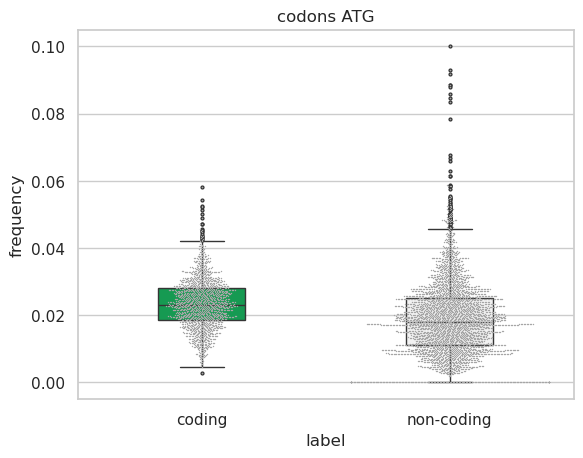

In [14]:
fig = fc.get_boxplot('codons', 'ATG', frqs_dict)
fig.savefig('figures/boxplot/codons_ATG.svg')

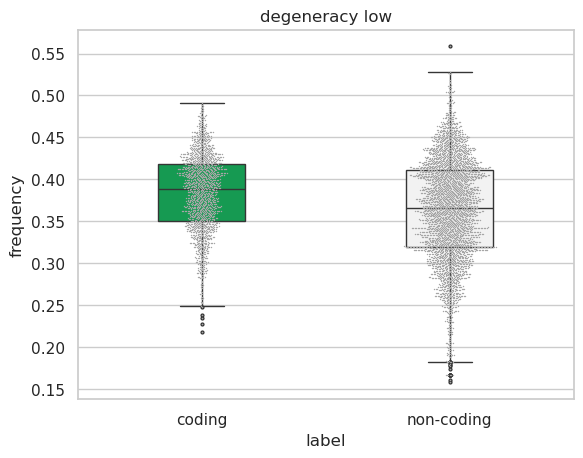

In [15]:
fig = fc.get_boxplot('degeneracy', 'low', frqs_dict)
fig.savefig('figures/boxplot/degeneracy_low.svg')

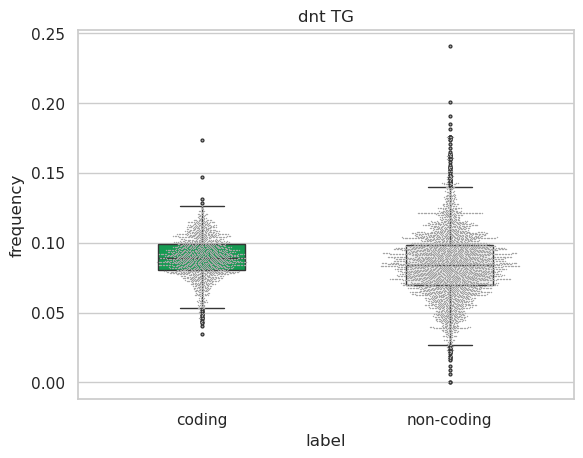

In [16]:
fig = fc.get_boxplot('dnt', 'TG', frqs_dict)
fig.savefig('figures/boxplot/dnt_TG.svg')